# Problem - 1

## Context
The comp-activ database comprises activity measures of computer systems. Data was gathered from a Sun Sparcstation 20/712 with 128 Mbytes of memory, operating in a multi-user university department. Users engaged in diverse tasks, such as internet access, file editing, and CPU-intensive programs.

Being an aspiring data scientist, you aim to establish a linear equation for predicting 'usr' (the percentage of time CPUs operate in user mode). Your goal is to analyze various system attributes to understand their influence on the system's 'usr' mode.

## Data Description :

### System measures used:

#### lread - Reads (transfers per second ) between system memory and user memory
#### lwrite - writes (transfers per second) between system memory and user memory
#### scall - Number of system calls of all types per second
#### sread - Number of system read calls per second .
#### swrite - Number of system write calls per second .
#### fork - Number of system fork calls per second.
#### exec - Number of system exec calls per second.
#### rchar - Number of characters transferred per second by system read calls
#### wchar - Number of characters transfreed per second by system write calls
#### pgout - Number of page out requests per second
#### ppgout - Number of pages, paged out per second
#### pgfree - Number of pages per second placed on the free list.
#### pgscan - Number of pages checked if they can be freed per second
#### atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second
#### pgin - Number of page-in requests per second
#### ppgin - Number of pages paged in per second
#### pflt - Number of page faults caused by protection errors (copy-on-writes).
#### vflt - Number of page faults caused by address translation .
#### runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run. Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)
#### freemem - Number of memory pages available to user processes
#### freeswap - Number of disk blocks available for page swapping.
------------------------
#### usr - Portion of time (%) that cpus run in user mode

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [207]:
data = pd.read_excel('compactiv.xlsx')

In [7]:
data.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [8]:
data.shape

(8192, 22)

In [9]:
data.dtypes

lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
pgscan      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz       object
freemem       int64
freeswap      int64
usr           int64
dtype: object

In [10]:
data.describe()

lread       lwrite         scall        sread       swrite  \
count  8192.000000  8192.000000   8192.000000  8192.000000  8192.000000   
mean     19.559692    13.106201   2306.318237   210.479980   150.058228   
std      53.353799    29.891726   1633.617322   198.980146   160.478980   
min       0.000000     0.000000    109.000000     6.000000     7.000000   
25%       2.000000     0.000000   1012.000000    86.000000    63.000000   
50%       7.000000     1.000000   2051.500000   166.000000   117.000000   
75%      20.000000    10.000000   3317.250000   279.000000   185.000000   
max    1845.000000   575.000000  12493.000000  5318.000000  5456.000000   

              fork         exec         rchar         wchar        pgout  ...  \
count  8192.000000  8192.000000  8.088000e+03  8.177000e+03  8192.000000  ...   
mean      1.884554     2.791998  1.973857e+05  9.590299e+04     2.285317  ...   
std       2.479493     5.212456  2.398375e+05  1.408417e+05     5.307038  ...   
min       0.000000     0.000000  2.780000e+02  1.498000e+03     0.000000  ...   
25%       0.400000     0.200000  3.409150e+04  2.291600e+04     0.000000  ...   
50%       0.800000     1.200000  1.254735e+05  4.661900e+04     0.000000  ...   
75%       2.200000     2.800000  2.678288e+05  1.061010e+05     2.400000  ...   
max      20.120000    59.560000  2.526649e+06  1.801623e+06    81.440000  ...   

            pgfree       pgscan         atch         pgin        ppgin  \
count  8192.000000  8192.000000  8192.000000  8192.000000  8192.000000   
mean     11.919712    21.526849     1.127505     8.277960    12.388586   
std      32.363520    71.141340     5.708347    13.874978    22.281318   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.600000     0.600000   
50%       0.000000     0.000000     0.000000     2.800000     3.800000   
75%       5.000000     0.000000     0.600000     9.765000    13.800000   
max     523.000000  1237.000000   211.580000   141.200000   292.610000   

              pflt         vflt       freemem      freeswap          usr  
count  8192.000000  8192.000000   8192.000000  8.192000e+03  8192.000000  
mean    109.793799   185.315796   1763.456299  1.328126e+06    83.968872  
std     114.419221   191.000603   2482.104511  4.220194e+05    18.401905  
min       0.000000     0.200000     55.000000  2.000000e+00     0.000000  
25%      25.000000    45.400000    231.000000  1.042624e+06    81.000000  
50%      63.800000   120.400000    579.000000  1.289290e+06    89.000000  
75%     159.600000   251.800000   2002.250000  1.730380e+06    94.000000  
max     899.800000  1365.000000  12027.000000  2.243187e+06    99.000000  

[8 rows x 21 columns]

In [209]:
data.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [211]:
for column in data.columns:
    if data[column].isnull().sum() > 0:  # Check for missing values
        # Fill missing values with mean
        data[column].fillna(data[column].mean(), inplace=True)

In [13]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data.shape)

Number of duplicate rows = 0
(8192, 22)


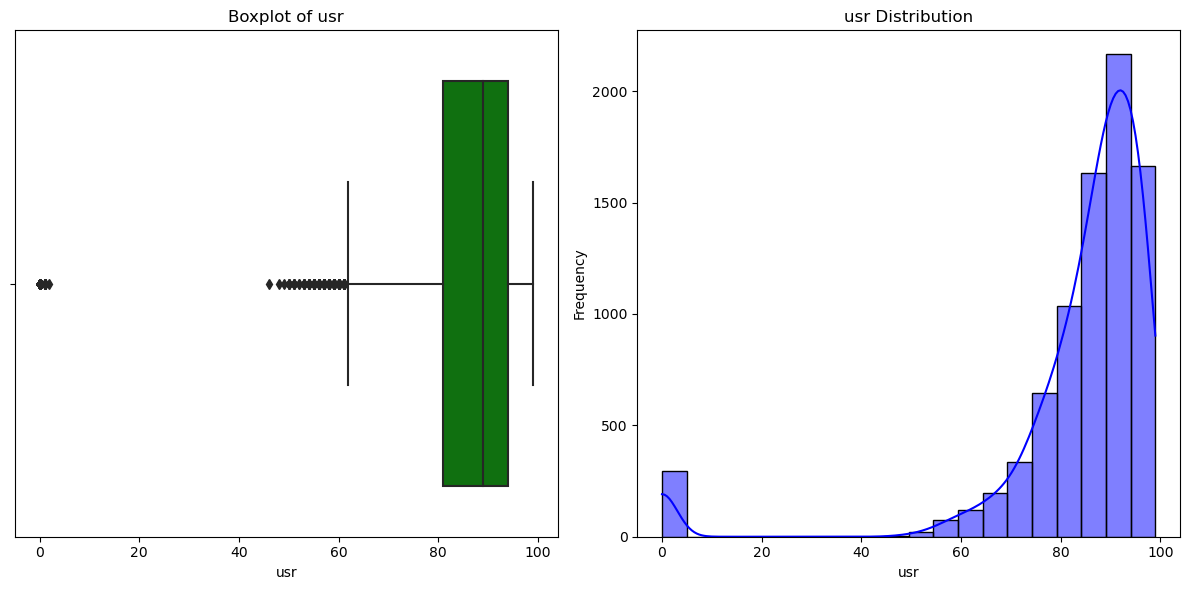

In [138]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=data, x='usr', color='green', ax=display[0])
display[0].set_title('Boxplot of usr')
display[0].set_xlabel('usr')

sns.histplot(data['usr'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('usr Distribution')
display[1].set_xlabel('usr')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

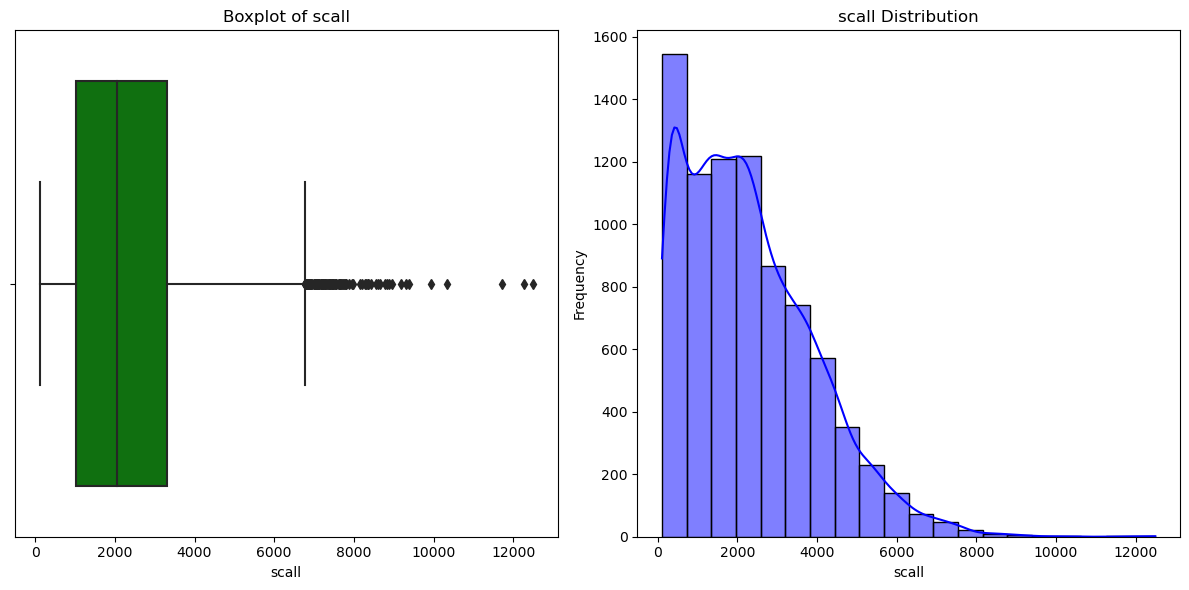

In [142]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=data, x='scall', color='green', ax=display[0])
display[0].set_title('Boxplot of scall')
display[0].set_xlabel('scall')

sns.histplot(data['scall'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('scall Distribution')
display[1].set_xlabel('scall')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

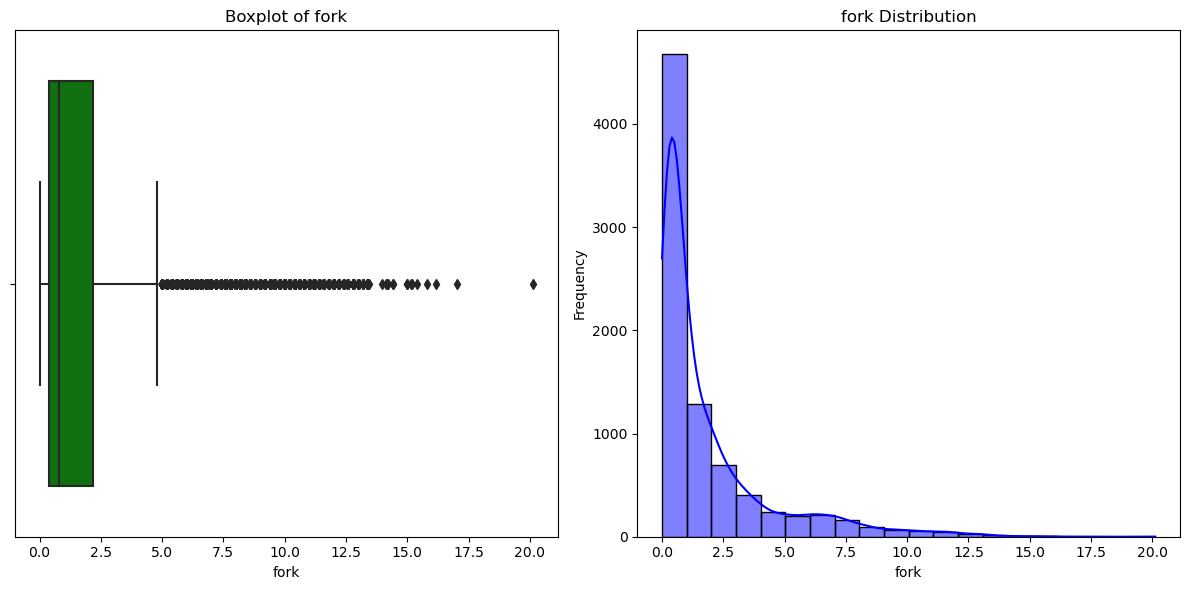

In [144]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=data, x='fork', color='green', ax=display[0])
display[0].set_title('Boxplot of fork')
display[0].set_xlabel('fork')

sns.histplot(data['fork'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('fork Distribution')
display[1].set_xlabel('fork')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

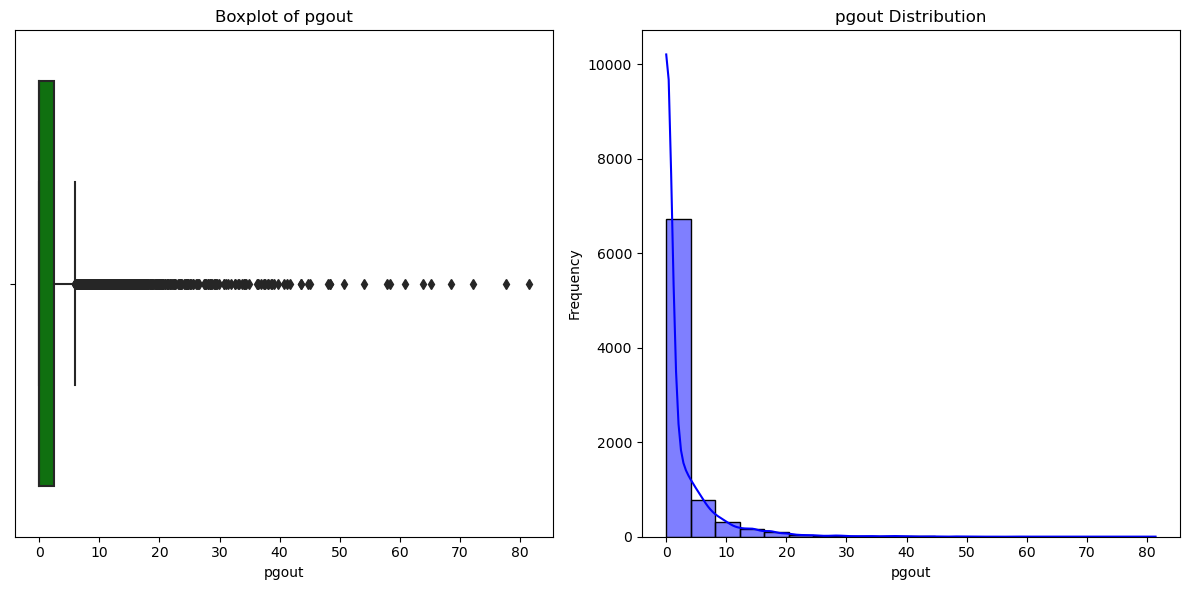

In [146]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=data, x='pgout', color='green', ax=display[0])
display[0].set_title('Boxplot of pgout')
display[0].set_xlabel('pgout')

sns.histplot(data['pgout'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('pgout Distribution')
display[1].set_xlabel('pgout')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

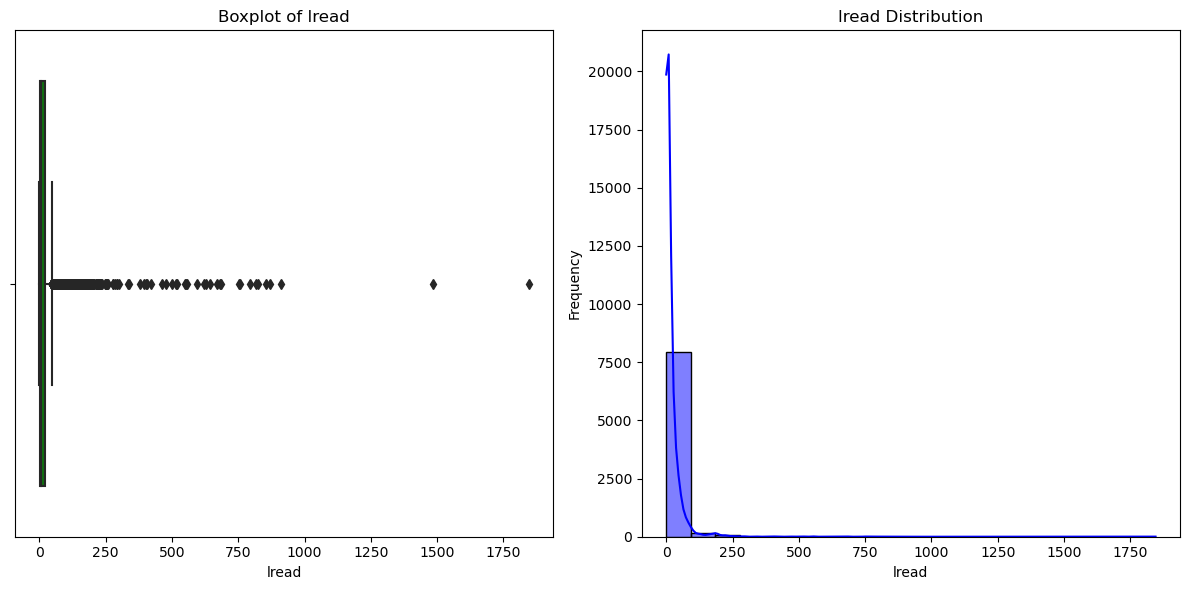

In [148]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=data, x='lread', color='green', ax=display[0])
display[0].set_title('Boxplot of lread')
display[0].set_xlabel('lread')

sns.histplot(data['lread'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('lread Distribution')
display[1].set_xlabel('lread')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

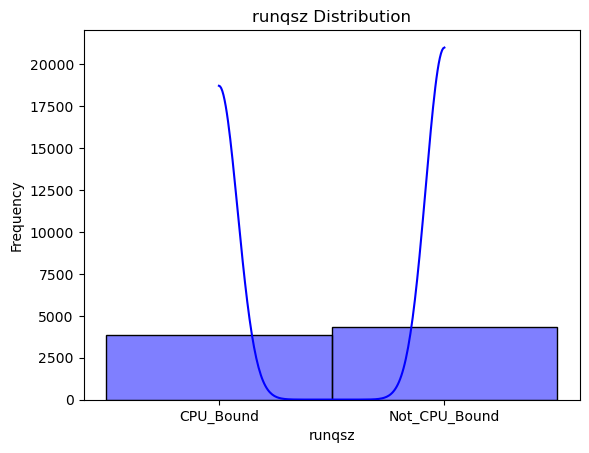

In [156]:
plt.figure
ax = sns.histplot(data['runqsz'], bins=20, kde=True, color='blue')
ax.set_title('runqsz Distribution')
ax.set_xlabel('runqsz')
ax.set_ylabel('Frequency')

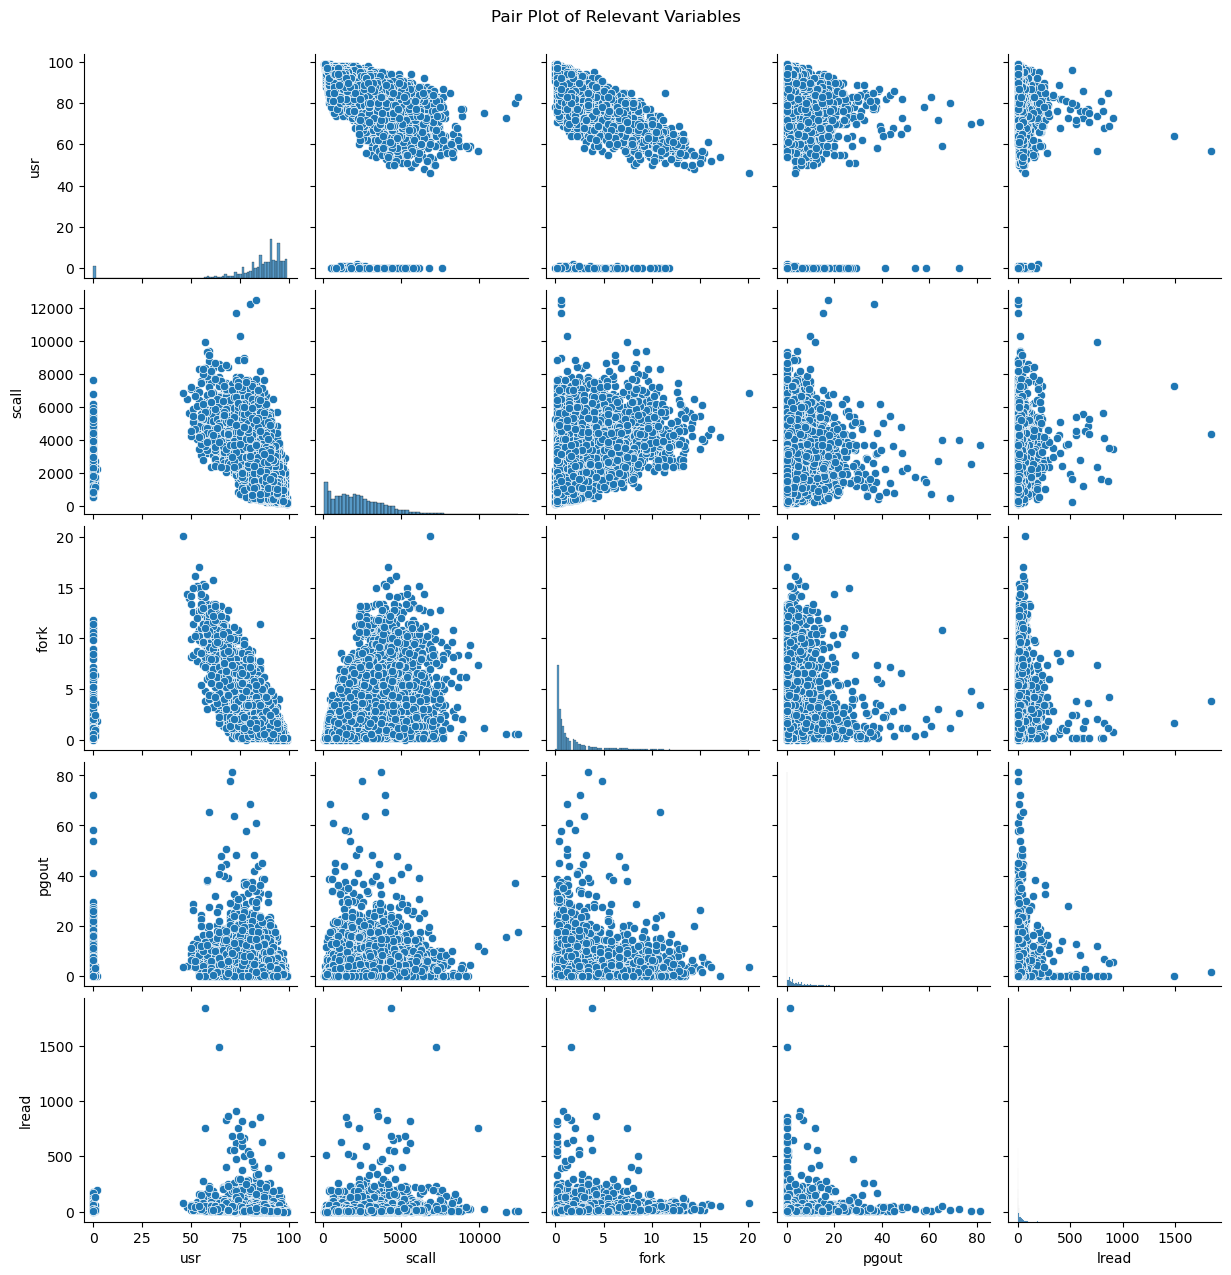

In [174]:
relevant_vars = ['usr', 'scall', 'fork', 'pgout', 'lread']

sns.pairplot(data[relevant_vars])
plt.suptitle('Pair Plot of Relevant Variables', y=1.02)
plt.show()

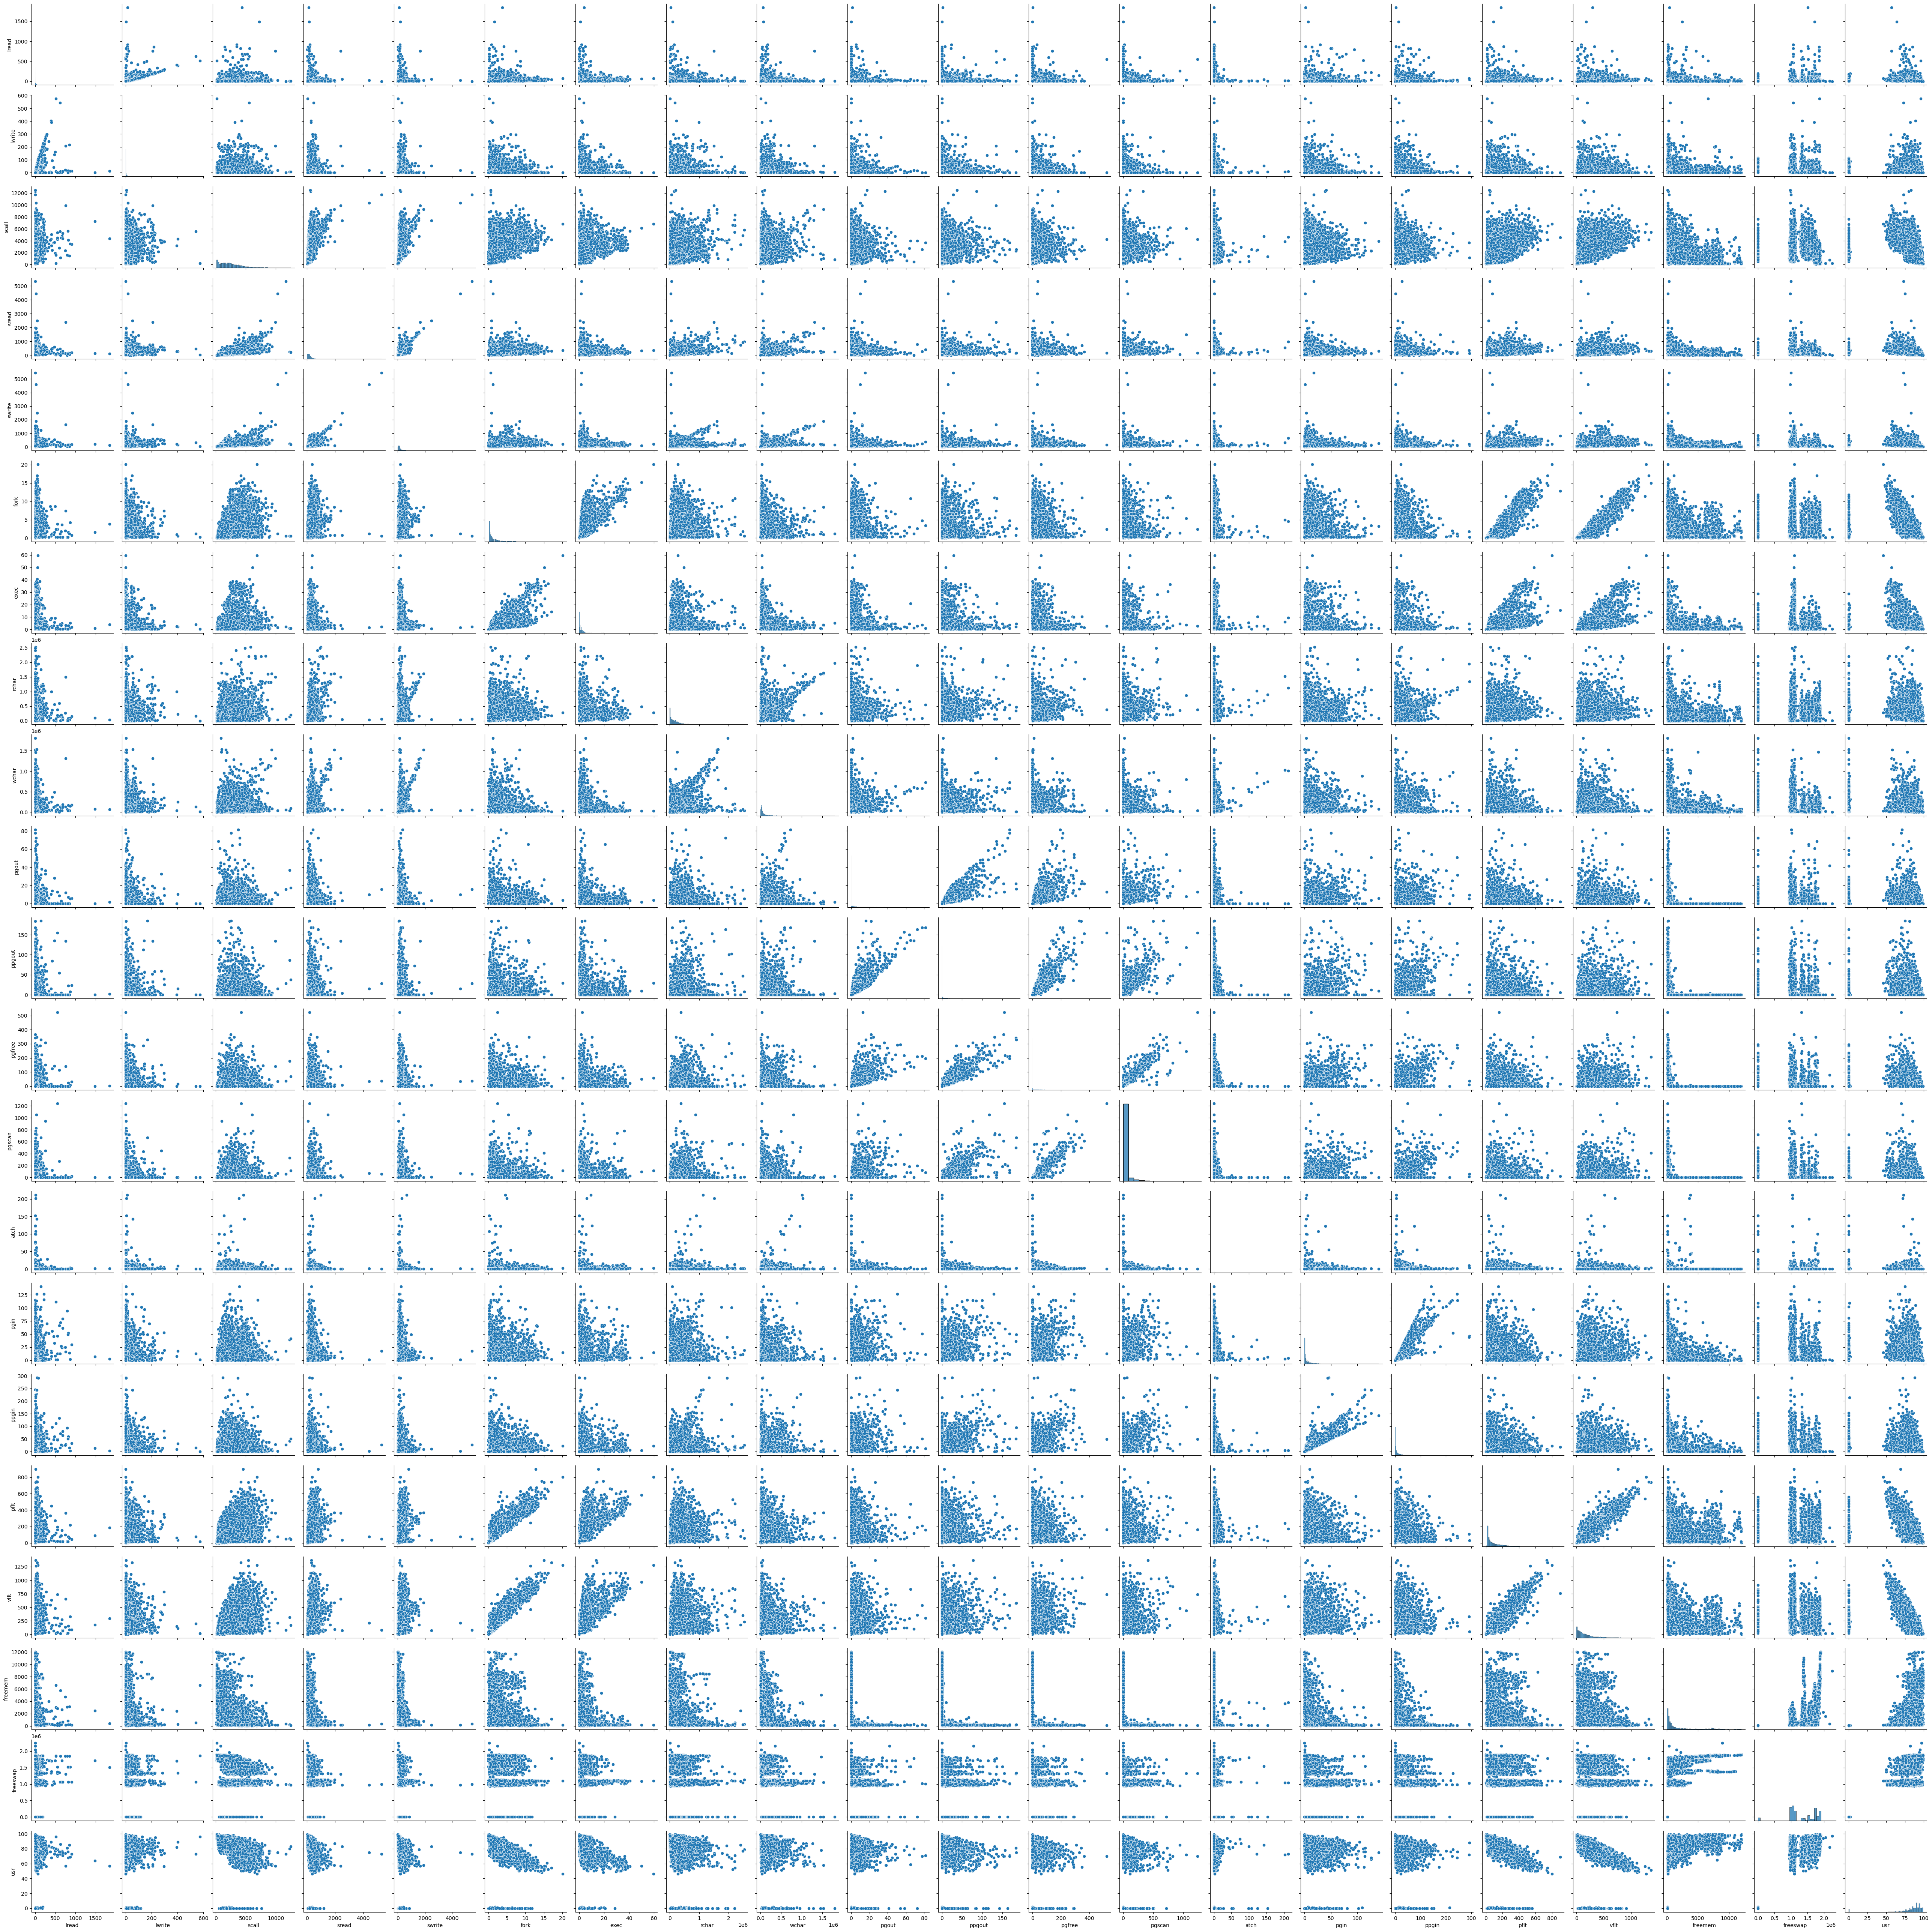

In [15]:
sns.pairplot(data)
plt.show()

In [176]:
def treat_outliers_iqr(df):
    df_outliers = df.copy()
    numerical_cols = df_outliers.select_dtypes(include=[np.number]).columns

    
    Q1 = df_outliers[numerical_cols].quantile(0.25)
    Q3 = df_outliers[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    for col in numerical_cols:
        df_outliers[col] = np.where(df_outliers[col] < lower_bound[col], lower_bound[col], df_outliers[col])
        df_outliers[col] = np.where(df_outliers[col] > upper_bound[col], upper_bound[col], df_outliers[col])

    return df_outliers

In [178]:
data_cleaned = treat_outliers_iqr(data)

numerical_cols = data_cleaned.select_dtypes(include=[np.number]).columns
Q1 = data_cleaned[numerical_cols].quantile(0.25)
Q3 = data_cleaned[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_cleaned[numerical_cols] < (Q1 - 1.5 * IQR)) | (data_cleaned[numerical_cols] > (Q3 + 1.5 * IQR)))
print("Outliers:\n", outliers.sum())

Outliers:
 lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
freemem     0
freeswap    0
usr         0
dtype: int64


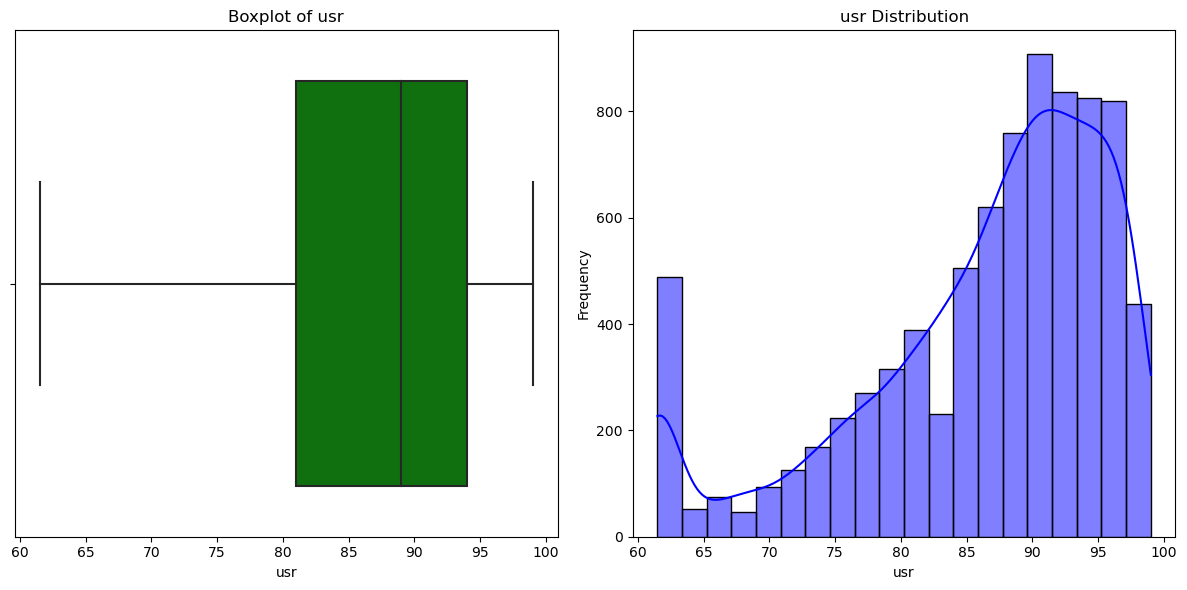

In [213]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=data_cleaned, x='usr', color='green', ax=display[0])
display[0].set_title('Boxplot of usr')
display[0].set_xlabel('usr')

sns.histplot(data_cleaned['usr'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('usr Distribution')
display[1].set_xlabel('usr')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation matrix

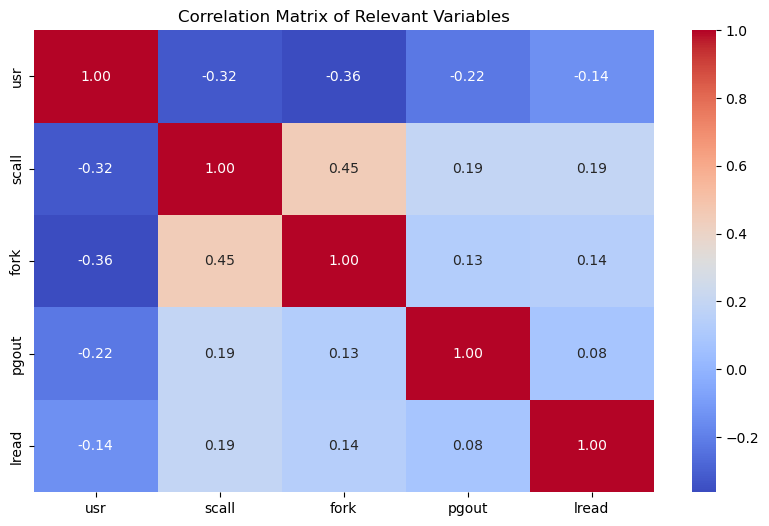

In [187]:
correlation_matrix = data[relevant_vars].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Relevant Variables')
plt.show()


In [189]:
correlation_matrix

usr     scall      fork     pgout     lread
usr    1.000000 -0.323188 -0.363277 -0.221877 -0.141394
scall -0.323188  1.000000  0.446766  0.194529  0.191377
fork  -0.363277  0.446766  1.000000  0.130192  0.140284
pgout -0.221877  0.194529  0.130192  1.000000  0.082463
lread -0.141394  0.191377  0.140284  0.082463  1.000000

In [191]:
data_cleaned['runqsz'] = data_cleaned['runqsz'].map({'CPU_Bound': 0, 'Not_CPU_Bound': 1})

print(data_cleaned['runqsz'].unique())

[0 1]


In [193]:
X = data_cleaned.drop(columns=['usr'])
Y = data_cleaned['usr']

In [225]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [229]:
train_stats = X_train.describe().transpose()
test_stats = X_test.describe().transpose()
summary_stats = pd.concat([train_stats, test_stats], axis=1, keys=['Training Set', 'Testing Set'])
summary_stats = summary_stats.swaplevel(axis=1)
summary_stats


count          mean            std          min          25%  \
         Training Set  Training Set   Training Set Training Set Training Set   
lread          6553.0  1.346193e+01      15.169810          0.0          2.0   
lwrite         6553.0  6.673432e+00       9.289463          0.0          0.0   
scall          6553.0  2.293820e+03    1593.526065        109.0       1012.0   
sread          6553.0  1.983947e+02     145.410875          6.0         86.0   
swrite         6553.0  1.367894e+02      96.104416          7.0         62.0   
fork           6553.0  1.559893e+00       1.594736          0.0          0.4   
exec           6553.0  1.947668e+00       2.045013          0.0          0.2   
rchar          6553.0  1.793303e+05  173650.661432        278.0      35708.0   
wchar          6553.0  7.557117e+04   70852.072007       1498.0      22916.0   
pgout          6553.0  1.427217e+00       2.201995          0.0          0.0   
ppgout         6553.0  2.581405e+00       4.051437          0.0          0.0   
pgfree         6553.0  3.192989e+00       5.005648          0.0          0.0   
pgscan         6553.0  0.000000e+00       0.000000          0.0          0.0   
atch           6553.0  3.863879e-01       0.560653          0.0          0.0   
pgin           6553.0  6.371800e+00       7.663443          0.0          0.6   
ppgin          6553.0  9.096652e+00      11.108803          0.0          0.6   
pflt           6553.0  1.058755e+02     101.713188          0.0         24.8   
vflt           6553.0  1.759175e+02     163.178312          0.2         45.4   
runqsz         6553.0  5.257134e-01       0.499376          0.0          0.0   
freemem        6553.0  1.396398e+03    1613.175558         55.0        230.0   
freeswap       6553.0  1.331211e+06  420519.145350      10989.5    1043112.0   

                  50%          75%           max       count          mean  \
         Training Set Training Set  Training Set Testing Set   Testing Set   
lread             7.0         20.0  4.700000e+01      1639.0  1.326663e+01   
lwrite            1.0         11.0  2.500000e+01      1639.0  6.593655e+00   
scall          2047.0       3305.0  6.775125e+03      1639.0  2.297138e+03   
sread           165.0        276.0  5.685000e+02      1639.0  2.053005e+02   
swrite          116.0        184.0  3.680000e+02      1639.0  1.426901e+02   
fork              0.8          2.4  4.900000e+00      1639.0  1.549286e+00   
exec              1.2          2.8  6.700000e+00      1639.0  1.866833e+00   
rchar        128515.0     263192.0  6.111961e+05      1639.0  1.816629e+05   
wchar         46726.0     106369.0  2.306259e+05      1639.0  7.639392e+04   
pgout             0.0          2.4  6.000000e+00      1639.0  1.395650e+00   
ppgout            0.0          4.2  1.050000e+01      1639.0  2.477926e+00   
pgfree            0.0          5.2  1.250000e+01      1639.0  3.051025e+00   
pgscan            0.0          0.0  0.000000e+00      1639.0  0.000000e+00   
atch              0.0          0.6  1.500000e+00      1639.0  3.958389e-01   
pgin              2.8          9.6  2.351250e+01      1639.0  6.439082e+00   
ppgin             3.8         13.8  3.360000e+01      1639.0  9.315497e+00   
pflt             64.0        160.2  3.615000e+02      1639.0  1.046789e+02   
vflt            120.4        251.8  5.614000e+02      1639.0  1.744430e+02   
runqsz            1.0          1.0  1.000000e+00      1639.0  5.405735e-01   
freemem         582.0       2018.0  4.659125e+03      1639.0  1.352547e+03   
freeswap    1300490.0    1731210.0  2.243187e+06      1639.0  1.317761e+06   

                    std         min         25%         50%         75%  \
            Testing Set Testing Set Testing Set Testing Set Testing Set   
lread         15.123030         0.0         2.0        6.00       19.00   
lwrite         9.304422         0.0         0.0        1.00        9.00   
scall       1591.845774       128.0      1020.0     2074.00     3349.00   
sread

In [231]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [233]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(Y_test, Y_pred))

Coefficients: [-5.58388357e-02  4.11932044e-02 -7.04230754e-04  2.26580581e-03
 -6.00091473e-03 -8.38398203e-02 -2.67043238e-01 -5.18231572e-06
 -4.96554120e-06 -4.82310641e-01 -5.03923704e-02  1.12472367e-01
 -1.11022302e-16  6.20457089e-01  3.83788719e-02 -6.84317250e-02
 -3.19855211e-02 -6.31714731e-03  1.81308939e+00 -4.87093502e-04
  9.40216006e-06]
Intercept: 82.97526974636537
Mean squared error (MSE): 20.75
Coefficient of determination (R^2): 0.78


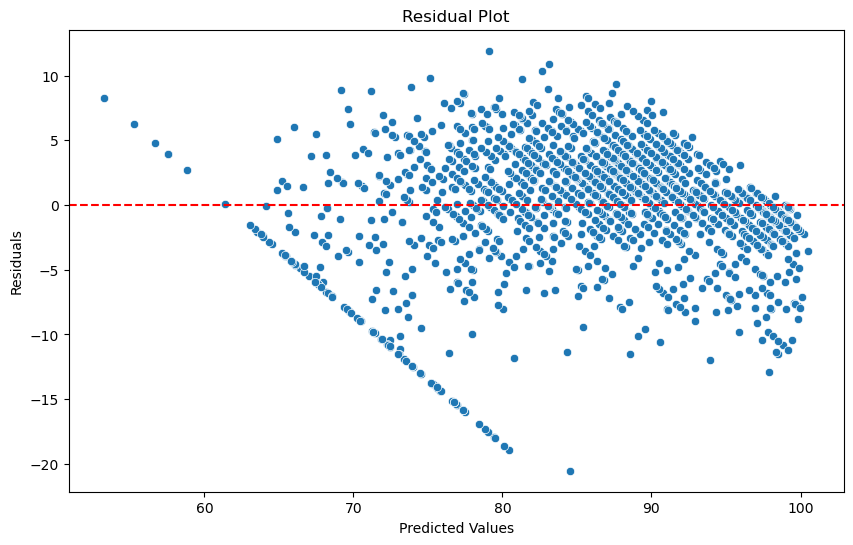

In [235]:
residuals = Y_test - Y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Model Summary : R-squared: 0.789: This indicates that approximately 78.9% of the variability in usr can be explained by the model. This is a high value, suggesting the model fits the data well.

## Adj. R-squared: 0.788: This adjusts the R-squared value for the number of predictors in the model. It’s very close to the R-squared value, indicating that the model’s complexity is appropriate.

# Coefficients
## Each coefficient represents the estimated change in the dependent variable (usr) for a one-unit change in the corresponding independent variable, holding all other variables constant.

### Intercept (82.97526974636537): This is the expected value of usr when all independent variables are zero. It represents the baseline usr value.
### Individual Coefficients:
#### The coefficients are listed in the same order as the features in your model. Here's a general interpretation for each, assuming they correspond to the features mentioned earlier:

* lread: -0.0558: For each unit increase in lread, usr is expected to decrease by approximately 0.0558 units.
* lwrite: 0.0412: For each unit increase in lwrite, usr is expected to increase by approximately 0.0412 units.
* scall: -0.0007: For each additional system call, usr decreases by 0.0007 units.
* sread: 0.0023: For each unit increase in sread, usr increases by approximately 0.0023 units.
* swrite: -0.0060: For each unit increase in swrite, usr decreases by 0.0060 units.
* fork: -0.0838: For each additional fork, usr decreases by approximately 0.0838 units.
* exec: -0.2670: For each additional exec, usr decreases by approximately 0.2670 units.
* rchar: -5.182e-06: For each unit increase in rchar, usr decreases by a very small amount.
* wchar: -4.966e-06: For each unit increase in wchar, usr decreases by a very small amount.
* pgout: -0.4823: For each unit increase in pgout, usr decreases by approximately 0.4823 units.
* ppgout: -0.0504: For each unit increase in ppgout, usr decreases by approximately 0.0504 units.
* pgfree: 0.1125: For each unit increase in pgfree, usr increases by approximately 0.1125 units.
* pgscan: -1.110e-16: This coefficient is extremely close to zero, indicating negligible impact.
* atch: 0.6205: For each unit increase in atch, usr increases by approximately 0.6205 units.
* pgin: 0.0384: For each unit increase in pgin, usr increases by approximately 0.0384 units.
* ppgin: -0.0684: For each unit increase in ppgin, usr decreases by approximately 0.0684 units.
* pflt: -0.0320: For each unit increase in pflt, usr decreases by approximately 0.0320 units.
* vflt: -0.0063: For each unit increase in vflt, usr decreases by approximately 0.0063 units.
* runqsz: 1.8131: For each unit increase in runqsz, usr increases by approximately 1.8131 units.
* freemem: -0.0005: For each unit increase in freemem, usr decreases by approximately 0.0005 units.
* freeswap: 9.402e-06: For each unit increase in freeswap, usr increases by a very small amount.
## Model Evaluation Metrics
### Mean Squared Error (MSE): 20.75: This represents the average squared difference between the observed actual outcomes and the predictions. Lower values indicate a better fit, with 20.75 being the average squared error in the predictions.

## Coefficient of Determination (R²): 0.78: This value indicates that approximately 78% of the variance in usr can be explained by the model. A value of 0.78 suggests a good fit, indicating the model explains a substantial portion of the variability in the data.

## Interpretation and Considerations
The positive and negative signs of the coefficients indicate the direction of the relationship between each predictor and usr.
The magnitude of each coefficient indicates the strength of the effect, with larger absolute values indicating stronger relationships.
Some coefficients are very small, suggesting minimal impact on usr.
The model explains a significant portion of the variance in usr, but there is still 22% unexplained variability, which might be due to factors not included in the model, measurement error, or random noise.

## Problem - 2
Objective
In your role as a statistician at the Republic of Indonesia Ministry of Health, you have been entrusted with a dataset containing information from a Contraceptive Prevalence Survey. This dataset encompasses data from 1473 married females who were either not pregnant or were uncertain of their pregnancy status during the survey.

Your task involves predicting whether these women opt for a contraceptive method of choice. This prediction will be based on a comprehensive analysis of their demographic and socio-economic attributes.

Data Description
1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

In [348]:
df = pd.read_excel('Contraceptive_method_dataset.xlsx')

In [350]:
df.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [352]:
df.shape

(1473, 10)

In [354]:
df.dtypes

Wife_age                     float64
Wife_ education               object
Husband_education             object
No_of_children_born          float64
Wife_religion                 object
Wife_Working                  object
Husband_Occupation             int64
Standard_of_living_index      object
Media_exposure                object
Contraceptive_method_used     object
dtype: object

In [356]:
df.describe()

Wife_age  No_of_children_born  Husband_Occupation
count  1402.000000          1452.000000         1473.000000
mean     32.606277             3.254132            2.137814
std       8.274927             2.365212            0.864857
min      16.000000             0.000000            1.000000
25%      26.000000             1.000000            1.000000
50%      32.000000             3.000000            2.000000
75%      39.000000             4.000000            3.000000
max      49.000000            16.000000            4.000000

In [358]:
print(df.isnull().sum())

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64


In [360]:
df['Wife_age'].fillna(df['Wife_age'].mean(), inplace=True)
df['No_of_children_born'].fillna(df['No_of_children_born'].median(), inplace=True)


In [362]:
print(df.isnull().sum())

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64


In [364]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

### Plot distributions of numerical variables

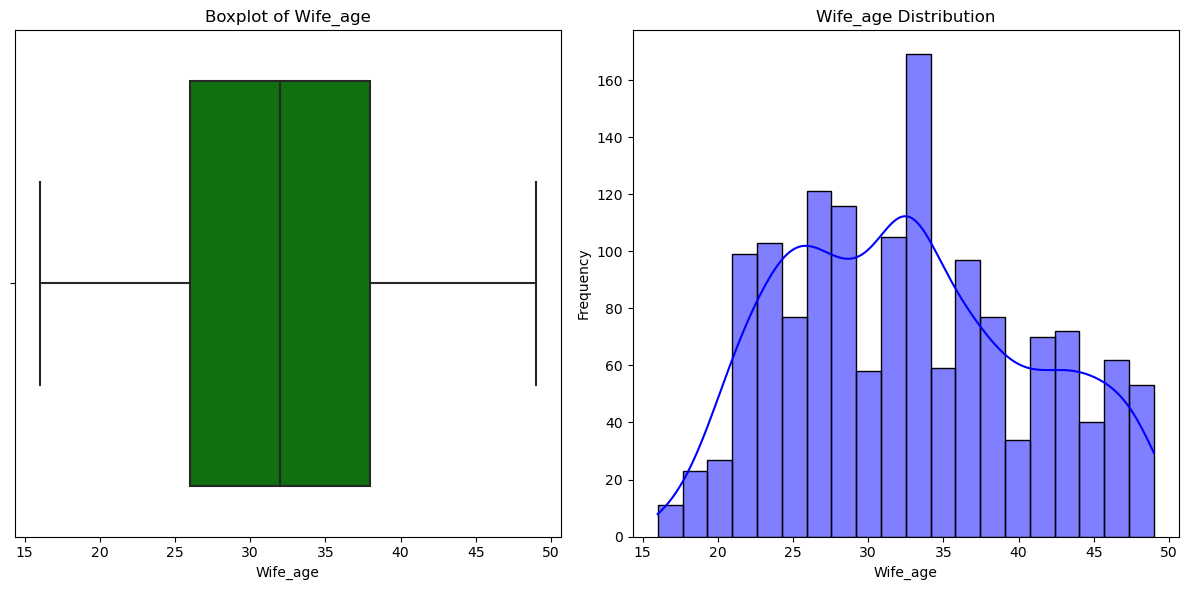

In [367]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='Wife_age', color='green', ax=display[0])
display[0].set_title('Boxplot of Wife_age')
display[0].set_xlabel('Wife_age')

sns.histplot(df['Wife_age'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Wife_age Distribution')
display[1].set_xlabel('Wife_age')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

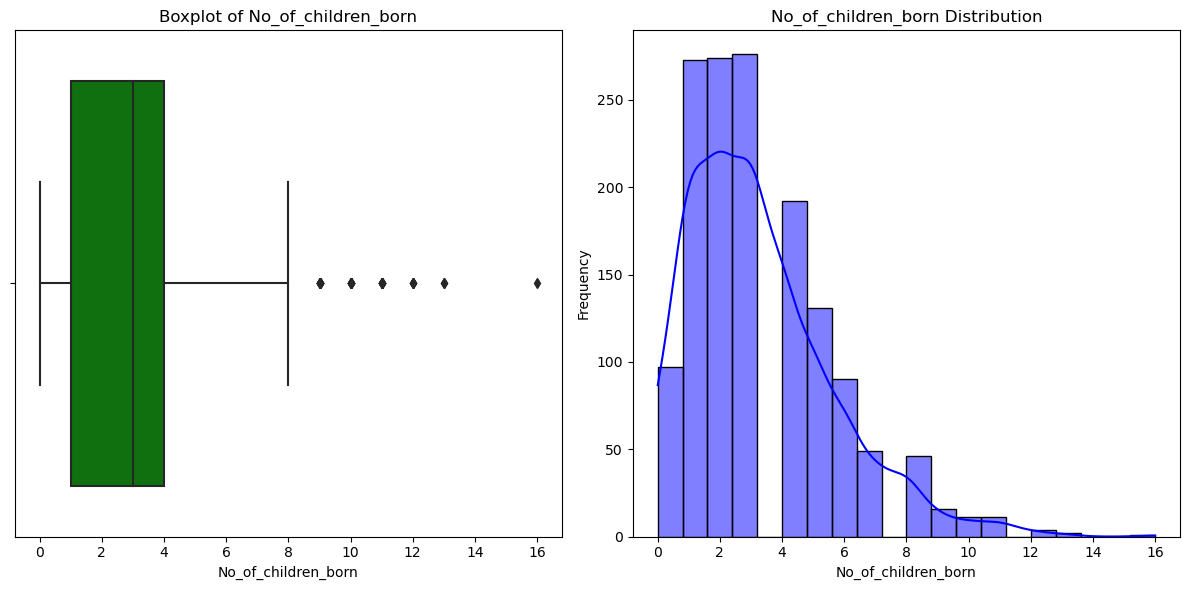

In [369]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='No_of_children_born', color='green', ax=display[0])
display[0].set_title('Boxplot of No_of_children_born')
display[0].set_xlabel('No_of_children_born')

sns.histplot(df['No_of_children_born'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('No_of_children_born Distribution')
display[1].set_xlabel('No_of_children_born')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

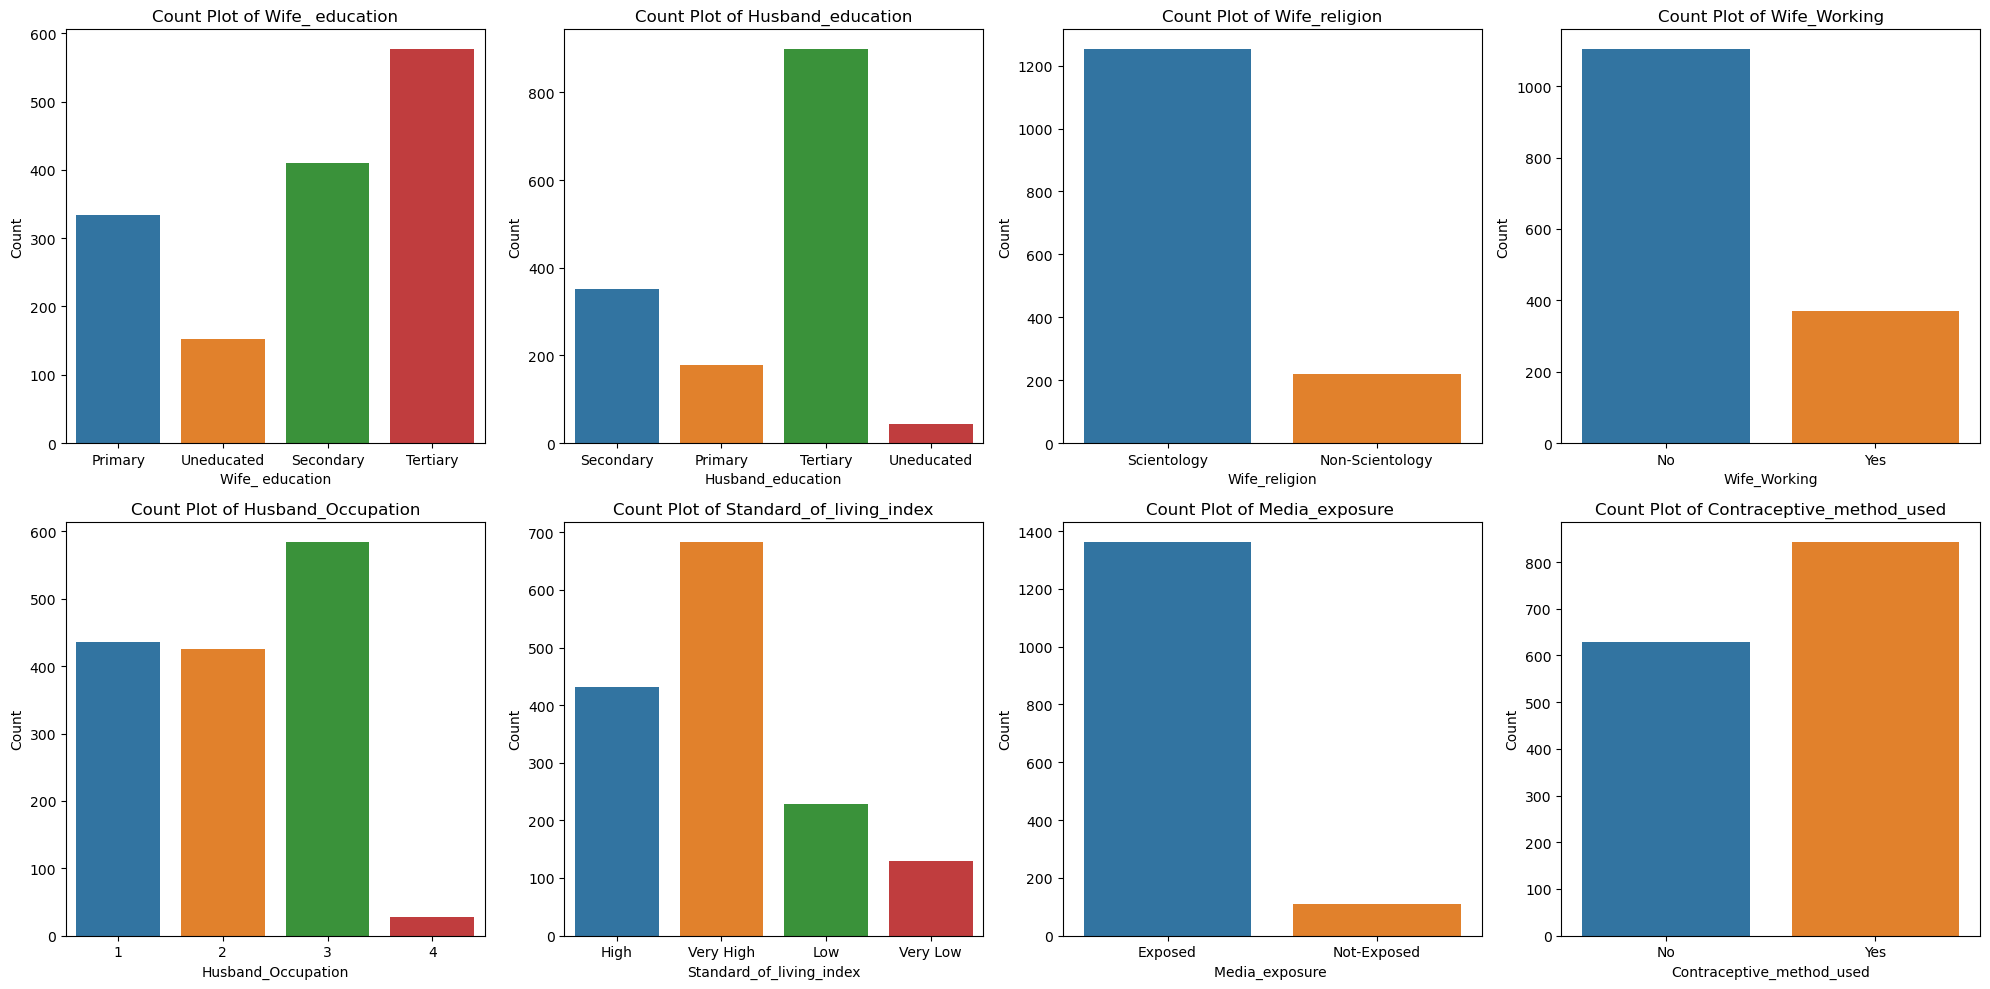

In [371]:
categorical_vars = ['Wife_ education', 'Husband_education', 'Wife_religion', 'Wife_Working', 'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ', 'Contraceptive_method_used']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))  # Adjust rows and columns based on the number of variables
axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier

for ax, var in zip(axes, categorical_vars):
    sns.countplot(x=var, data=df, ax=ax)
    ax.set_title(f'Count Plot of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')

for i in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [373]:
numeric_data = df.select_dtypes(include=[float, int])
categorical_data = df.select_dtypes(include=['object'])

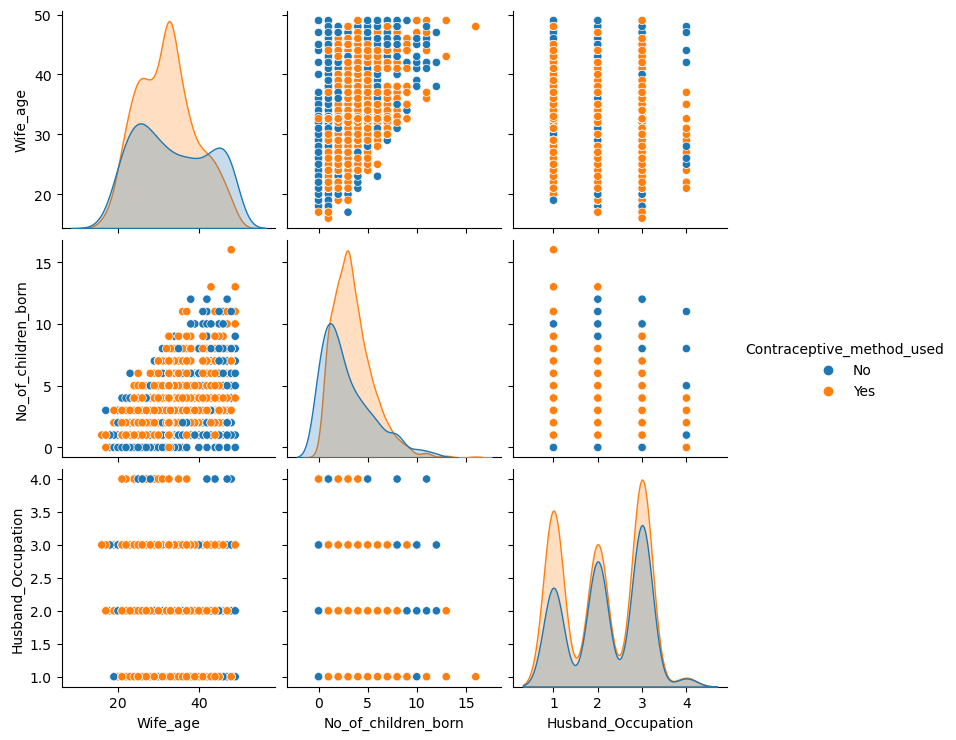

In [375]:
sns.pairplot(df, hue='Contraceptive_method_used')
plt.show()

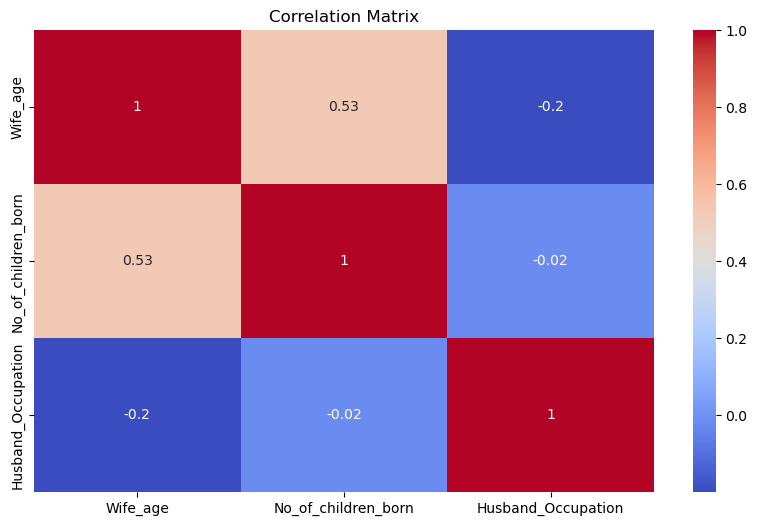

In [377]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [379]:
numeric_data.corr()

Wife_age  No_of_children_born  Husband_Occupation
Wife_age             1.000000             0.527365           -0.199495
No_of_children_born  0.527365             1.000000           -0.020354
Husband_Occupation  -0.199495            -0.020354            1.000000

In [381]:
df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

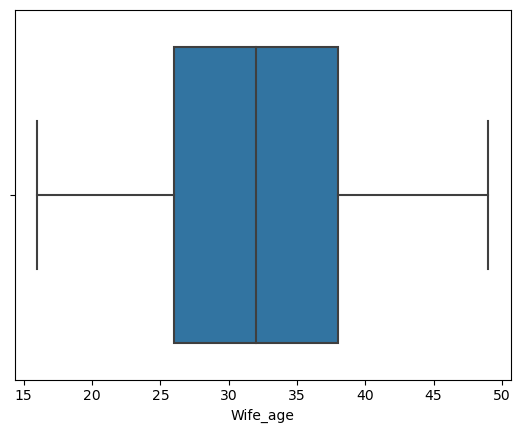

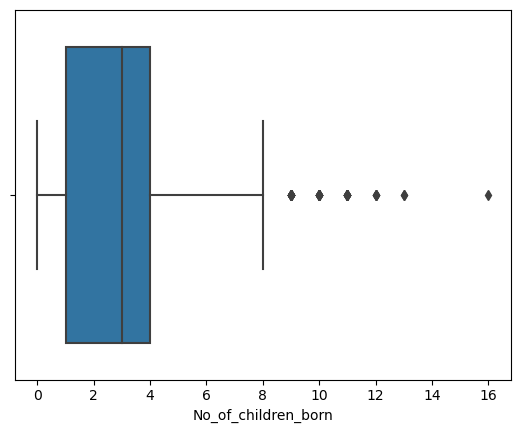

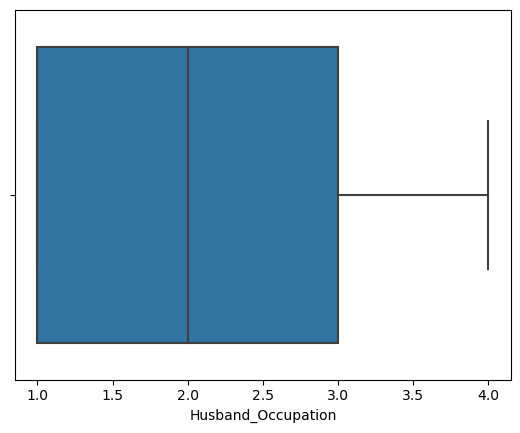

In [383]:
for var in numeric_data:
    sns.boxplot(x=df[var])
    plt.show()

In [385]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [387]:
le = LabelEncoder()

binary_vars = ['Wife_religion', 'Wife_Working', 'Media_exposure ', 'Contraceptive_method_used']
for var in binary_vars:
    df[var] = le.fit_transform(df[var])
    
df = pd.get_dummies(df, columns=['Wife_ education', 'Husband_education', 'Husband_Occupation', 'Standard_of_living_index'], drop_first=True)


In [391]:
X = df.drop('Contraceptive_method_used', axis=1)
y = df['Contraceptive_method_used']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [393]:

train_stats = X_train.describe().transpose()
test_stats = X_test.describe().transpose()
summary_stats = pd.concat([train_stats, test_stats], axis=1, keys=['Training Set', 'Testing Set'])
summary_stats = summary_stats.swaplevel(axis=1)
summary_stats


count         mean          std          min  \
                    Training Set Training Set Training Set Training Set   
Wife_age                  1178.0    32.900330     8.165499         16.0   
No_of_children_born       1178.0     3.331919     2.416528          0.0   
Wife_religion             1178.0     0.853990     0.353266          0.0   
Wife_Working              1178.0     0.255518     0.436337          0.0   
Media_exposure            1178.0     0.079796     0.271093          0.0   

                             25%          50%          75%          max  \
                    Training Set Training Set Training Set Training Set   
Wife_age                    26.0    32.606277         39.0         49.0   
No_of_children_born          2.0     3.000000          5.0         16.0   
Wife_religion                1.0     1.000000          1.0          1.0   
Wife_Working                 0.0     0.000000          1.0          1.0   
Media_exposure               0.0     0.000000          0.0          1.0   

                          count        mean         std         min  \
                    Testing Set Testing Set Testing Set Testing Set   
Wife_age                  295.0   31.432056    7.592324        16.0   
No_of_children_born       295.0    2.925424    2.025651         0.0   
Wife_religion             295.0    0.837288    0.369730         0.0   
Wife_Working              295.0    0.230508    0.421874         0.0   
Media_exposure            295.0    0.050847    0.220059         0.0   

                            25%         50%         75%         max  
                    Testing Set Testing Set Testing Set Testing Set  
Wife_age                   25.0        31.0        36.0        49.0  
No_of_children_born         1.0         3.0         4.0        11.0  
Wife_religion               1.0         1.0         1.0         1.0  
Wife_Working                0.0         0.0         0.0         1.0  
Media_exposure              0.0         0.0         0.0         1.0

In [344]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.6542372881355932
[[ 61  69]
 [ 33 132]]
              precision    recall  f1-score   support

           0       0.65      0.47      0.54       130
           1       0.66      0.80      0.72       165

    accuracy                           0.65       295
   macro avg       0.65      0.63      0.63       295
weighted avg       0.65      0.65      0.64       295



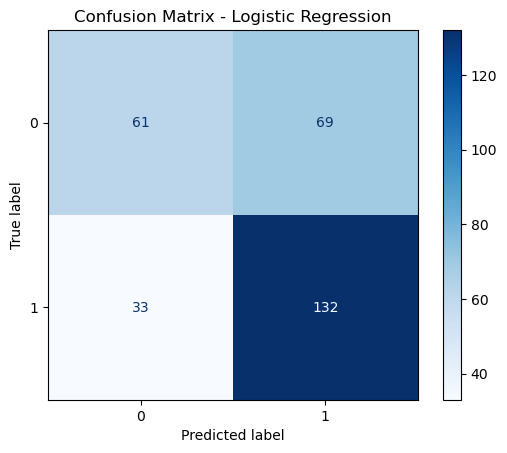

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [395]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred_lda = lda.predict(X_test)
print('LDA Accuracy:', accuracy_score(y_test, y_pred_lda))
print(confusion_matrix(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))

LDA Accuracy: 0.6610169491525424
[[ 62  68]
 [ 32 133]]
              precision    recall  f1-score   support

           0       0.66      0.48      0.55       130
           1       0.66      0.81      0.73       165

    accuracy                           0.66       295
   macro avg       0.66      0.64      0.64       295
weighted avg       0.66      0.66      0.65       295



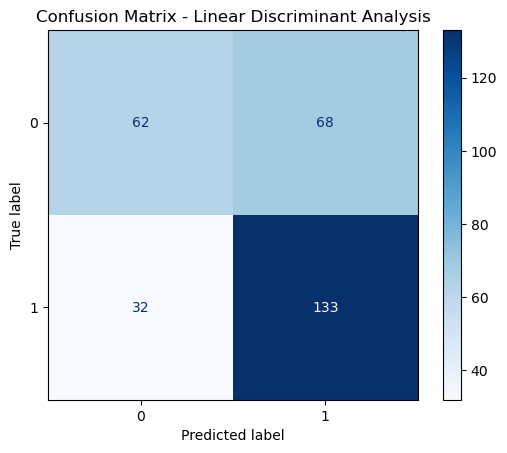

In [106]:
cm_lda = confusion_matrix(y_test, y_pred_lda)
disp_lda = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=lda.classes_)
disp_lda.plot(cmap='Blues')
plt.title('Confusion Matrix - Linear Discriminant Analysis')
plt.show()


In [108]:
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)

y_pred_cart = cart.predict(X_test)
print('CART Accuracy:', accuracy_score(y_test, y_pred_cart))
print(confusion_matrix(y_test, y_pred_cart))
print(classification_report(y_test, y_pred_cart))

CART Accuracy: 0.6406779661016949
[[ 79  51]
 [ 55 110]]
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       130
           1       0.68      0.67      0.67       165

    accuracy                           0.64       295
   macro avg       0.64      0.64      0.64       295
weighted avg       0.64      0.64      0.64       295



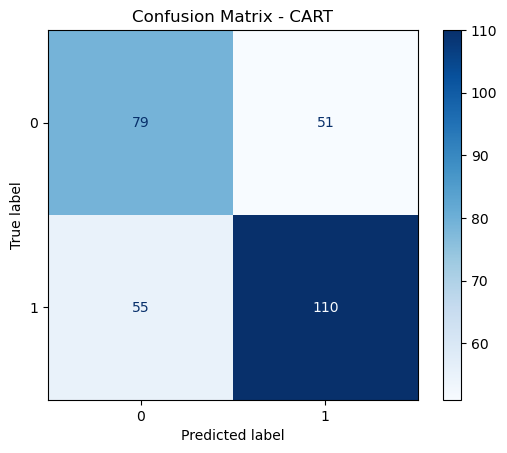

In [110]:
cm_cart = confusion_matrix(y_test, y_pred_cart)
disp_cart = ConfusionMatrixDisplay(confusion_matrix=cm_cart, display_labels=cart.classes_)
disp_cart.plot(cmap='Blues')
plt.title('Confusion Matrix - CART')
plt.show()


In [114]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_cart = grid_search.best_estimator_

y_pred_best_cart = best_cart.predict(X_test)
print('Best CART Accuracy:', accuracy_score(y_test, y_pred_best_cart))
print(confusion_matrix(y_test, y_pred_best_cart))
print(classification_report(y_test, y_pred_best_cart))

Best CART Accuracy: 0.6983050847457627
[[ 53  77]
 [ 12 153]]
              precision    recall  f1-score   support

           0       0.82      0.41      0.54       130
           1       0.67      0.93      0.77       165

    accuracy                           0.70       295
   macro avg       0.74      0.67      0.66       295
weighted avg       0.73      0.70      0.67       295



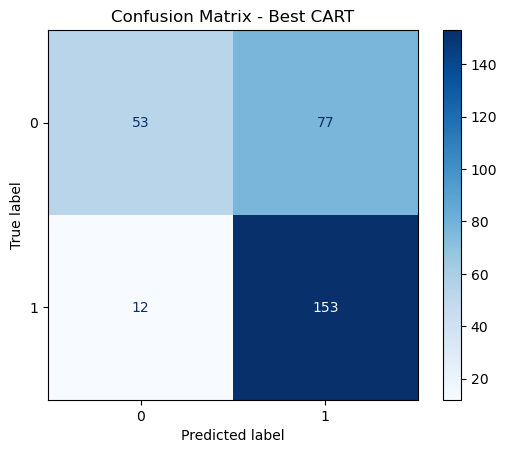

In [116]:
cm_best_cart = confusion_matrix(y_test, y_pred_best_cart)
disp_best_cart = ConfusionMatrixDisplay(confusion_matrix=cm_best_cart, display_labels=best_cart.classes_)
disp_best_cart.plot(cmap='Blues')
plt.title('Confusion Matrix - Best CART')
plt.show()


In [118]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'LDA', 'CART', 'Pruned CART'],
    'Accuracy': [accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_lda), 
                 accuracy_score(y_test, y_pred_cart), accuracy_score(y_test, y_pred_best_cart)]
})

print(results)

                 Model  Accuracy
0  Logistic Regression  0.654237
1                  LDA  0.661017
2                 CART  0.640678
3          Pruned CART  0.698305


In [120]:
importances = best_cart.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                               Feature  Importance
1                  No_of_children_born    0.486706
0                             Wife_age    0.290703
6             Wife_ education_Tertiary    0.151669
5            Wife_ education_Secondary    0.036658
8          Husband_education_Secondary    0.019774
15  Standard_of_living_index_Very High    0.011499
3                         Wife_Working    0.002020
2                        Wife_religion    0.000970
4                      Media_exposure     0.000000
7           Wife_ education_Uneducated    0.000000
9           Husband_education_Tertiary    0.000000
10        Husband_education_Uneducated    0.000000
11                Husband_Occupation_2    0.000000
12                Husband_Occupation_3    0.000000
13                Husband_Occupation_4    0.000000
14        Standard_of_living_index_Low    0.000000
16   Standard_of_living_index_Very Low    0.000000


## Performance Comparison
### Here is a summary of the performance metrics across all models:

#### Logistic Regression
* Accuracy: 0.6542
* Precision: 0.65 (class 0), 0.66 (class 1)
* Recall: 0.47 (class 0), 0.80 (class 1)
* F1-score: 0.54 (class 0), 0.72 (class 1)
#### Linear Discriminant Analysis (LDA)
* Accuracy: 0.6610
* Precision: 0.66 (class 0), 0.66 (class 1)
* Recall: 0.48 (class 0), 0.81 (class 1)
* F1-score: 0.55 (class 0), 0.73 (class 1)
#### CART (Decision Tree)
* Accuracy: 0.6441
* Precision: 0.59 (class 0), 0.69 (class 1)
* Recall: 0.62 (class 0), 0.66 (class 1)
* F1-score: 0.61 (class 0), 0.67 (class 1)
#### Pruned CART (Best CART)
* Accuracy: 0.6983
* Precision: 0.82 (class 0), 0.67 (class 1)
* Recall: 0.41 (class 0), 0.93 (class 1)
* F1-score: 0.54 (class 0), 0.77 (class 1)
## Choosing the Best Model
### Based on the comparison of the performance metrics, the Pruned CART (Best CART) model has the highest accuracy (0.6983) among the models. It also shows a good balance in terms of precision and recall, especially for class 1 (users of contraceptive methods). The high recall for class 1 indicates that the model is effective in identifying most users of contraceptive methods, which is crucial in a public health context.

## Key Takeaways
### Age and Number of Children: These are typically important features in predicting contraceptive use, as observed in the feature importance ranking. Younger women or those with fewer children may be less likely to use contraceptive methods.

#### Education: Both wife's and husband's education levels are significant predictors. Higher education levels are often associated with increased awareness and use of contraceptive methods.

#### Standard of Living and Media Exposure: A higher standard of living and good media exposure are crucial. These factors indicate better access to information and resources related to contraceptive methods.

#### Employment Status: The working status of the wife plays a role. Employed women might have different family planning needs and access to contraceptive methods.

#### Religion: While the dataset may have binary encoding, cultural and religious beliefs significantly influence contraceptive use.

## Actionable Insights and Recommendations

#### Targeted Awareness Programs: Develop and implement targeted awareness programs focusing on younger women and those with lower education levels. Use educational campaigns to highlight the benefits and availability of contraceptive methods.

#### Improve Accessibility: Enhance the accessibility of contraceptive methods in areas with lower standards of living. Subsidize contraceptive methods or provide them for free to low-income families.

#### Leverage Media Exposure: Use media channels effectively to disseminate information about family planning and contraceptive use. Partner with popular media outlets to run campaigns.

#### Workplace Initiatives: Introduce workplace family planning programs and resources. Encourage employers to provide information and access to contraceptive methods for working women.

#### Cultural Sensitivity: Develop culturally sensitive educational materials and programs that respect religious beliefs while promoting contraceptive use.